In [3]:
import pandas as pd

# Replace 'sales.csv' with the actual filename
df = pd.read_csv('sales.csv', parse_dates=['Date'], dayfirst=False)  # parse_dates optional
df.head()           # preview first rows
df.shape            # get (rows, cols)
df.info()           # column types and non-null counts
df.describe()       # numeric summary

# make column-names simple: lower-case, no spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Example: ensure quantity and unit_price are numeric
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

# check missing values
print(df.isna().sum())

# drop rows missing a date or product (these are usually essential)
df = df.dropna(subset=['date', 'product'])

# fill missing numeric values sensibly:
df['quantity'] = df['quantity'].fillna(0).astype(int)
df['unit_price'] = df['unit_price'].fillna(df['unit_price'].median())

if 'total' not in df.columns:
    df['total'] = df['quantity'] * df['unit_price']

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])   # drop rows where date could not parse

# add helpful columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')

# filter by region
west_sales = df[df['region'] == 'West']

# filter by date range
mask = (df['date'] >= '2024-01-01') & (df['date'] < '2025-01-01')
df_2024 = df[mask]

sales_by_product = df.groupby('product')['total'].sum().sort_values(ascending=False)
sales_by_product.head(10)

sales_by_region = df.groupby('region')['total'].sum().sort_values(ascending=False)

monthly_sales = df.resample('ME', on='date')['total'].sum()
monthly_sales

pivot = df.pivot_table(values='total', index='category', columns='region', aggfunc='sum', fill_value=0)
pivot


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Region      100 non-null    object        
 2   Product     100 non-null    object        
 3   Category    100 non-null    object        
 4   Quantity    100 non-null    int64         
 5   Unit_Price  100 non-null    int64         
 6   Total       100 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB
date          0
region        0
product       0
category      0
quantity      0
unit_price    0
total         0
dtype: int64


region,East,North,South,West
category,,,,
Clothing,3260,4290,3660,3100
Electronics,13040,19760,17600,13960
Furniture,14300,8600,7550,6450


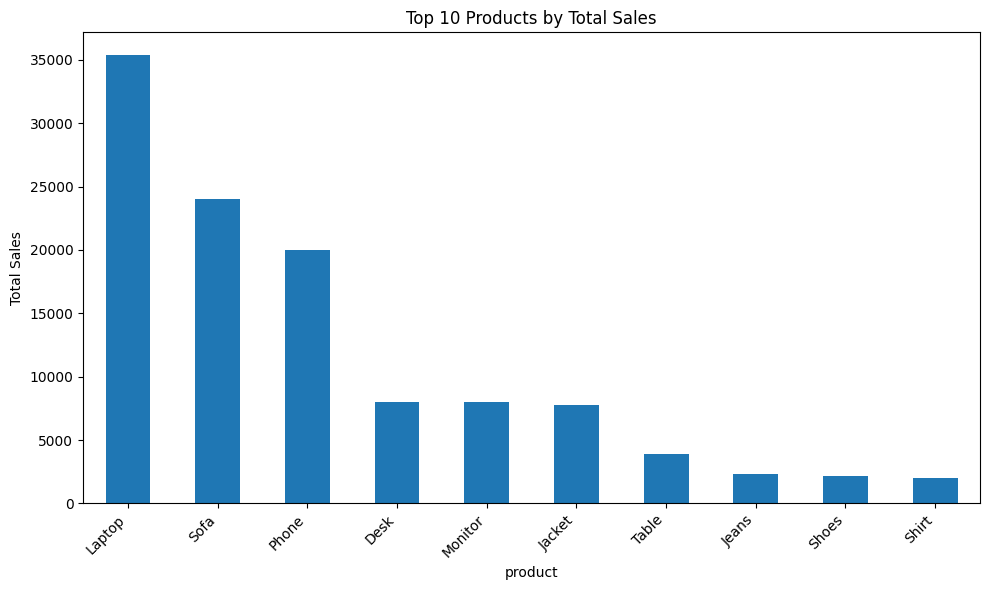

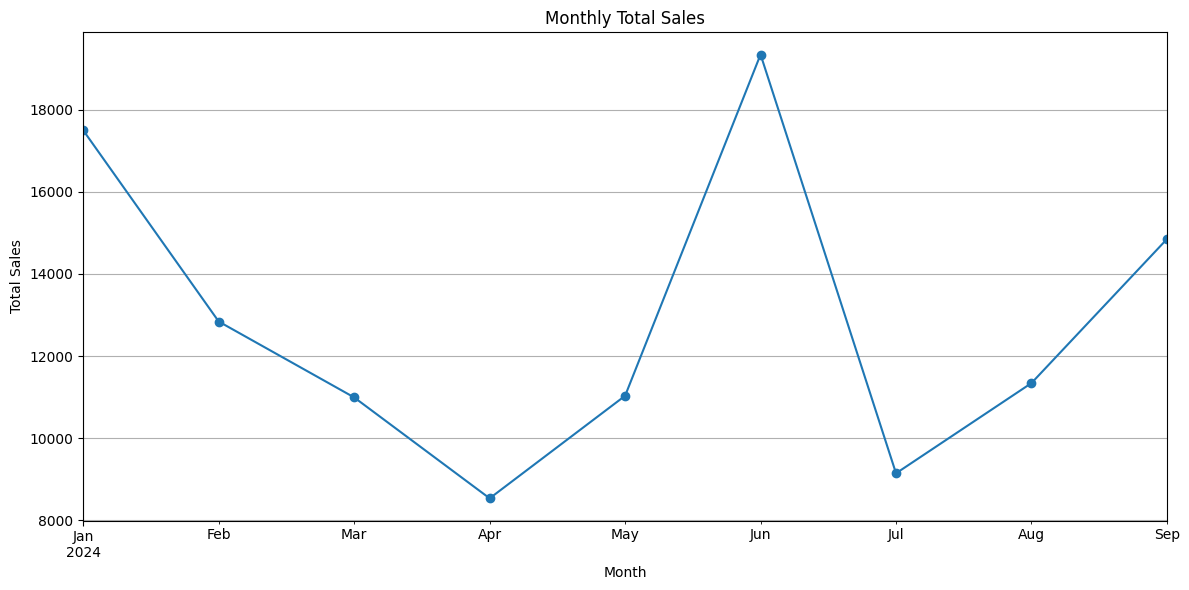

In [4]:
import matplotlib.pyplot as plt

# Top 10 products
top10 = sales_by_product.head(10)
plt.figure(figsize=(10,6))
top10.plot(kind='bar')
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top10_products.png', dpi=150)
plt.show()

# Monthly sales line
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales.png', dpi=150)
plt.show()
